# Shocktube Test

In [ ]:
import os, sys
sys.path += ['..']
import plot_tools as pt
import numpy as np
import matplotlib.pyplot as plt

# more setup
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Interpolate and Diff

### Exact Solution

In [ ]:
exact = pt.ds.load_data("../../../data/shocktube/exact_solutions/Balsara1/solution_last.dat")
# interp func of exact solution
rho_exact = pt.interp1d_data(exact, cols=[1,2], kind='zero')
bvecy_exact = pt.interp1d_data(exact, cols=[1,7], kind='zero')

#### Compare different kind of interpolation

In [ ]:
#%matplotlib inline
pt.plt_exact(exact, cols=[1,2], kind=['linear','nearest','zero','slinear','next'], num=1600, marker='-')

In [ ]:
#%matplotlib inline
pt.plt_exact(exact, cols=[1,7], kind=['linear','nearest','zero','slinear','next'], num=1600, marker='-')

### Numerical Solution

In [ ]:
dirs = [
    "n200",
    "n400",
    "n800",
    "n1600"
]
for i in range(len(dirs)):
    dirs[i] = "../../../data/shocktube/Balsara1/" + dirs[i]

rho = pt.DataSet(dirs, r"hydrobase-rho*", cols=[8,11])
bvecy = pt.DataSet(dirs, r"hydrobase-bvec*", cols=[8,12])

In [ ]:
# calc all: diff, integrate, convergence order
rho.calcAll(rho_exact, order=1)
bvecy.calcAll(bvecy_exact, order=1)

### Convergence Order

In [ ]:
rho.getConvSet()

In [ ]:
bvecy.getConvSet()

## Plot

### $\rho$

[-0.4975     -0.49687461 -0.49624922 ...  0.50124922  0.50187461
  0.5025    ] 204


ValueError: A value in x_new is above the interpolation range.

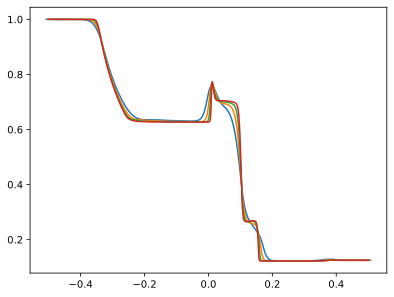

In [9]:
rho.pltData(f_ref=rho_exact, num_ref=1600)

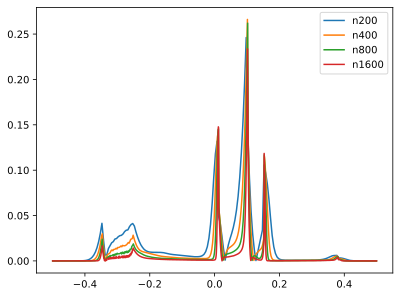

In [26]:
rho.pltDiff()

###### Assume 1st order convergent

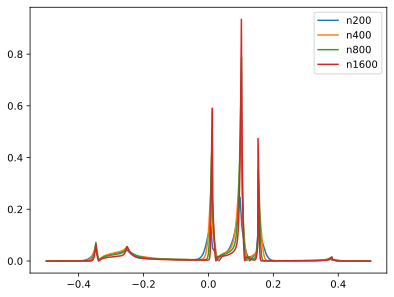

In [23]:
convOrder=1
rho.pltDiff(fy=lambda y,i: y*(i+1)**(convOrder))

### $B_y$

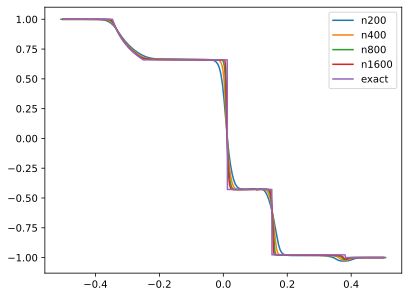

In [12]:
bvecy.pltData(f_ref=bvecy_exact,num=1600)

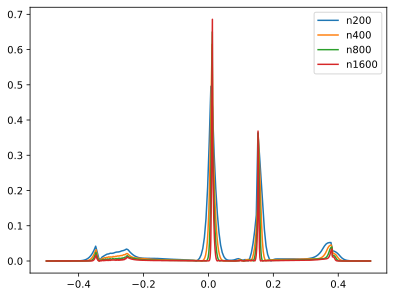

In [13]:
bvecy.pltDiff()

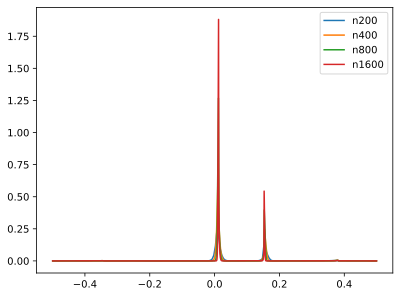

In [14]:
convOrder=1
bvecy.pltDiff(fy=lambda y,i: y*(i+1)**(convOrder))